# Spanish Translation A/B Test
A/B tests play a huge role in website optimization. Analyzing A/B tests data is a very important data scientist responsibility. Especially, data scientists have to make sure that results are reliable, trustworthy, and conclusions can be drawn.

Furthermore, companies often run tens, if not hundreds, of A/B tests at the same time. Manually analyzing all of them would require lot of time and people. Therefore, it is common practice to look at the typical A/B test analysis steps and try to automate as much as possible. This frees up time for the data scientists to work on more high level topics.

In this challenge, you will have to analyze results from an A/B test. Also, you will be asked to `design an algorithm to automate some steps`.


## Challenge Description
Company XYZ is a worldwide e-commerce site with localized versions of the site.
A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.

Spain and LatAm country manager suggested that one reason could be translation. All Spanish- speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain.

After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!

You are asked to:
    - Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better
    - Explain why that might be happening. Are the localized translations really worse?
    - If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#### Load Data

In [11]:
test = pd.read_csv('Translation_Test/test_table.csv',parse_dates =['date'])
user = pd.read_csv('Translation_Test/user_table.csv')

In [6]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           453321 non-null  int64         
 1   date              453321 non-null  datetime64[ns]
 2   source            453321 non-null  object        
 3   device            453321 non-null  object        
 4   browser_language  453321 non-null  object        
 5   ads_channel       181877 non-null  object        
 6   browser           453321 non-null  object        
 7   conversion        453321 non-null  int64         
 8   test              453321 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 31.1+ MB


In [5]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


Left join 2 tables on user_id. (can check if they are unique in user table) len(test['userid']) = len(test['userid'].unique())

In [14]:
df = pd.merge(test,user,how='left', on='user_id')
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


#### Confirming Testing Resule

Now, the test is based on country(Spain vs Non-Spain). The difference is on non-spain countries. We want to show that non-spain countries in test set is doing worse than non-spain counties in contrast set. 

In [15]:
non_spain = df[df['country'] != 'Spain']
non_s_test = non_spain[non_spain['test'] ==1]
non_s_cont = non_spain[non_spain['test'] == 0]

In [16]:
non_s_test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1,M,31.0,Bolivia


In [17]:
non_s_test['conversion'].mean()

0.043424713982118966

In [18]:
non_s_cont['conversion'].mean()

0.04833042316066309

Using T-test

In [23]:
ttest_ind(non_s_test['conversion'], non_s_cont['conversion'], equal_var = True)

Ttest_indResult(statistic=-7.422512095954769, pvalue=1.15144687852198e-13)

p-value < 0.0025, (0.5%, one-side is 0.25%), so we can reject the null.  So the test side is worse.

#### Analyze

What's the difference between Spain and non-Spain?

In [27]:
#adding a column 'Spain', which is 1 if Spain, 0 if non-Spain
df['Spain'] = df['country'].apply(lambda x: 1 if x == 'Spain' else 0)
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country,Spain
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain,1
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico,0
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain,1
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico,0
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico,0


In [31]:
#source
source = df[['source','Spain','conversion']].groupby(['source','Spain']).mean()
source

conversion
source Spain            
Ads    0        0.045955
       1        0.079452
Direct 0        0.045633
       1        0.081029
SEO    0        0.045457
       1        0.079321

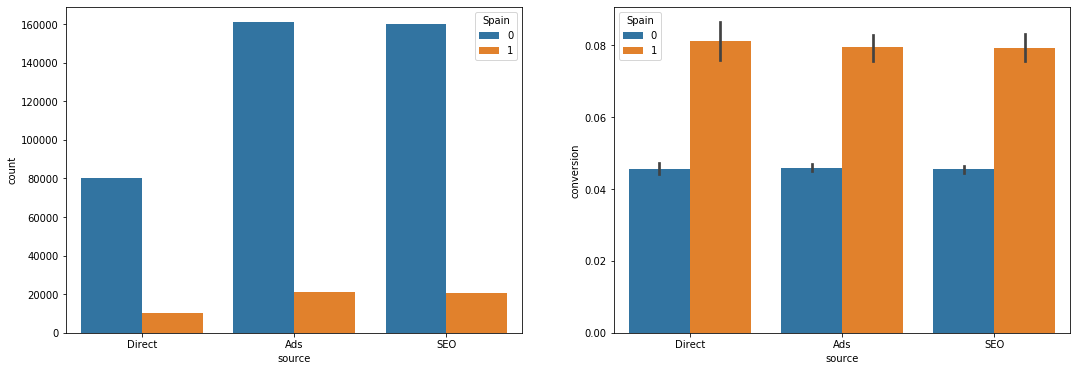

In [30]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.countplot(x='source', hue='Spain', data=df,ax=ax[0])
sns.barplot(x='source', y='conversion', hue='Spain', data=df, ax=ax[1])

We can see that Spain has higher conversion across all the sources, and there are no big difference between different sources. 

In [32]:
#device
device = df[['device','Spain','conversion']].groupby(['device','Spain']).mean()
device

conversion
device Spain            
Mobile 0        0.046239
       1        0.080279
Web    0        0.045253
       1        0.079273

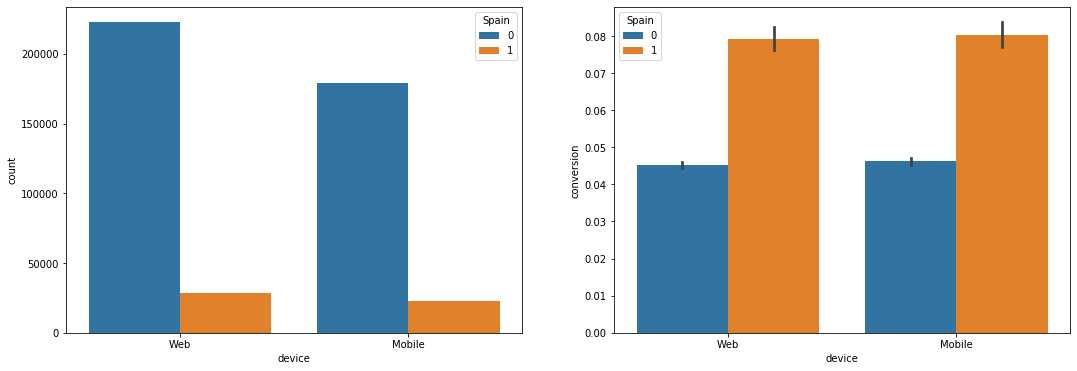

In [33]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.countplot(x='device', hue='Spain', data=df,ax=ax[0])
sns.barplot(x='device', y='conversion', hue='Spain', data=df, ax=ax[1])

Similar result as the source.

In [34]:
#browser language
browser_lan = df[['browser_language','Spain','conversion']].groupby(['browser_language','Spain']).mean()
browser_lan

conversion
browser_language Spain            
EN               0        0.044547
                 1        0.078099
ES               0        0.045903
                 1        0.079799
Other            0        0.045101
                 1        0.085417

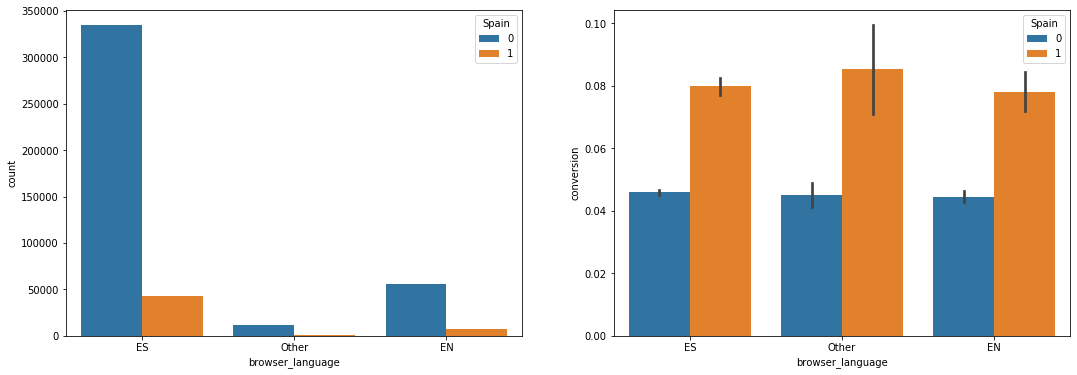

In [38]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.countplot(x='browser_language', hue='Spain', data=df,ax=ax[0])
sns.barplot(x='browser_language', y='conversion', hue='Spain', data=df, ax=ax[1])

In [39]:
#ads channel
ads_channel = df[['ads_channel','Spain','conversion']].groupby(['ads_channel','Spain']).mean()
ads_channel

conversion
ads_channel Spain            
Bing        0        0.043748
            1        0.087664
Facebook    0        0.047075
            1        0.079064
Google      0        0.045604
            1        0.076677
Other       0        0.039441
            1        0.080483
Yahoo       0        0.046113
            1        0.083063

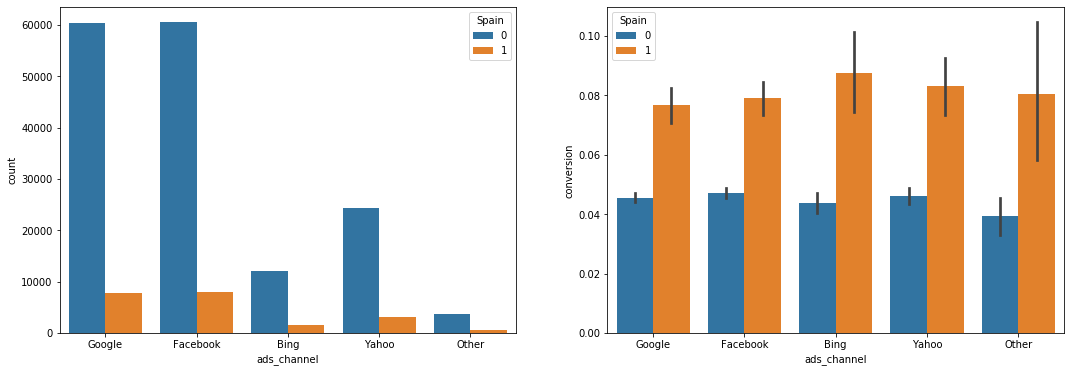

In [40]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.countplot(x='ads_channel', hue='Spain', data=df,ax=ax[0])
sns.barplot(x='ads_channel', y='conversion', hue='Spain', data=df, ax=ax[1])

Here we see some difference, Bing has the highest conversion rate in Spain, but not in non_Spain countries. And other ads_channel has lowest conversion rate in non_Spain countries while they perform well in Spain. 


So we should consider whether people in Spain or non_Spain have different behavior regards the ads_channel.

In [41]:
#browser
browser = df[['browser','Spain','conversion']].groupby(['browser','Spain']).mean()
browser

conversion
browser     Spain            
Android_App 0        0.046076
            1        0.080808
Chrome      0        0.045691
            1        0.078515
FireFox     0        0.045629
            1        0.081081
IE          0        0.044952
            1        0.081479
Iphone_App  0        0.046782
            1        0.078527
Opera       0        0.050344
            1        0.079208
Safari      0        0.043493
            1        0.075996

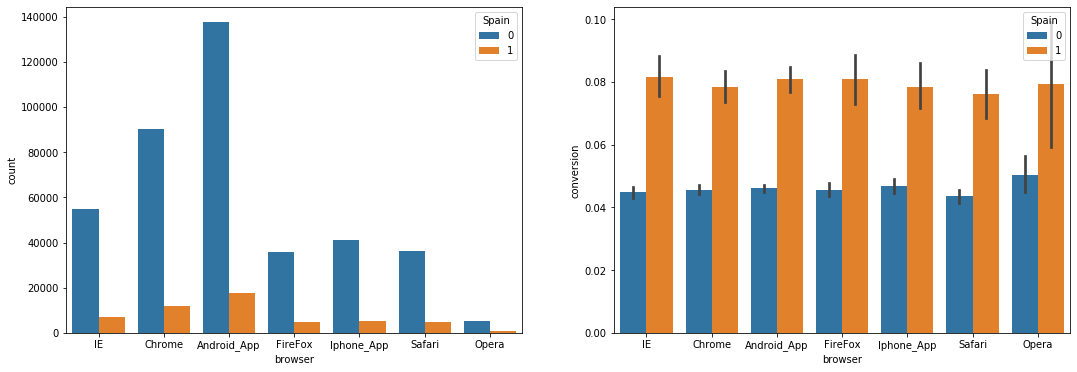

In [42]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.countplot(x='browser', hue='Spain', data=df,ax=ax[0])
sns.barplot(x='browser', y='conversion', hue='Spain', data=df, ax=ax[1])

In [43]:
#sex
sex = df[['sex','Spain','conversion']].groupby(['sex','Spain']).mean()
sex

conversion
sex Spain            
F   0        0.045651
    1        0.079104
M   0        0.045677
    1        0.080151

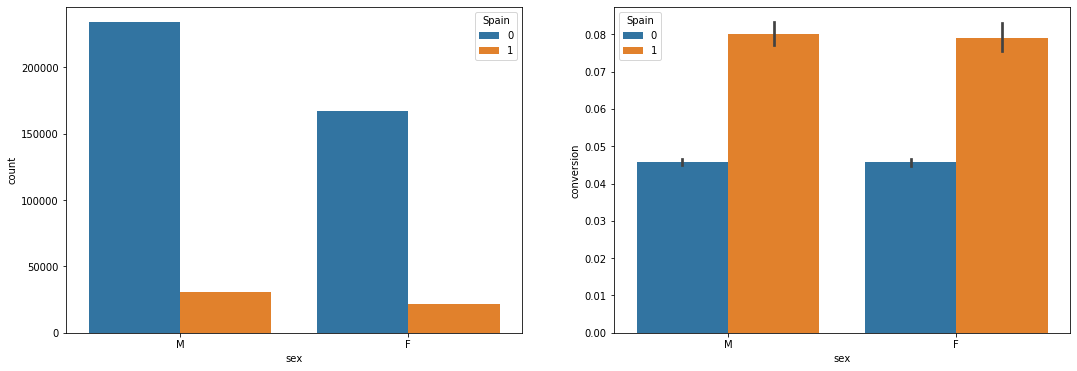

In [44]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.countplot(x='sex', hue='Spain', data=df,ax=ax[0])
sns.barplot(x='sex', y='conversion', hue='Spain', data=df, ax=ax[1])